* https://langchain-ai.github.io/langgraph/tutorials/introduction/
* https://langchain-ai.github.io/langgraph/how-tos/subgraph/#define-subgraphs 

In [1]:
from dotenv import load_dotenv

load_dotenv() 


True

In [2]:
from graph_builders import create_default_casual_chatbot_graph_builder 

basic_casual_chatbot_graph = create_default_casual_chatbot_graph_builder() 

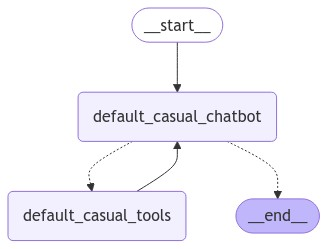

In [3]:
from IPython.display import Image, display

try:
    display(Image(basic_casual_chatbot_graph.compile().get_graph().draw_mermaid_png()))
except Exception:
    pass

In [4]:
from graph_builders import create_rigorous_llm_graph 

rigorous_llm_graph_builder = create_rigorous_llm_graph(
    chatbot_subgraph=basic_casual_chatbot_graph
)

rigorous_llm = rigorous_llm_graph_builder.compile() 

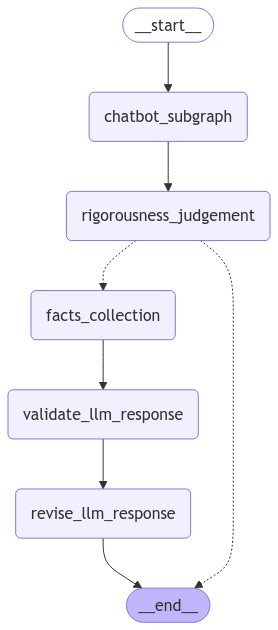

In [5]:
from IPython.display import Image, display

try:
    display(Image(rigorous_llm.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [6]:
def stream_graph_updates(user_input: str):
    for event in rigorous_llm.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            print("Event", value)
            if ("messages" in value): 
                print("Assistant:", value["messages"][-1].content)

    # event = rigorous_llm.invoke({"messages": [("user", user_input)]})
    # for m in event["messages"]: 
    #     print(m)

while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break

    stream_graph_updates(user_input)

    # DEBUG 
    break 

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Event {'rigorousness_required': False, 'messages': [HumanMessage(content='who is Bill Gates?', additional_kwargs={}, response_metadata={}, id='c00368aa-b19f-448b-b59a-ea3f74c304e5'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_RNGQftHQEn0RIw65MLrOfKhX', 'function': {'arguments': '{"query":"Bill Gates"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 86, 'total_tokens': 105, 'prompt_tokens_details': {'cached_tokens': 0}, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-3db8a226-4229-486f-ab18-b9afd8c67254-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'Bill Gates'}, 'id': 'call_RNGQftHQEn0RIw65MLrOfKhX', 'type': 'tool_call'}], usage_metadata={'input_tokens': 86, 'output_tokens': 19, 'total_tokens': 105}

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Judgement of the need of rigorousness: True
INFO:root:Extracting facts from tool messages: 1573bcda-7594-421e-abc5-da492acc9e1e


Event {'rigorousness_required': True}


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Event {'facts': {'1573bcda-7594-421e-abc5-da492acc9e1e': ['Bill Gates was born on October 28, 1955, in Seattle, Washington, U.S.', 'Bill Gates is an American computer programmer and entrepreneur.', "Bill Gates cofounded Microsoft Corporation, the world's largest personal-computer software company.", 'Gates wrote his first software program at the age of 13.', "In high school, Bill Gates helped form a group of programmers who computerized their school's payroll system.", 'Bill Gates founded Traf-O-Data.', 'Queen Elizabeth II knighted Bill Gates in 2005.', 'At age 31, Bill Gates became the youngest American billionaire.', 'Bill and Melinda Gates were designated Time Magazine\'s "Persons of the Year" in 2005.', "Bill Gates is passionate about Microsoft's work and remains involved with the company.", 'Bill Gates is a member of the board and technology advisor at Microsoft.', 'Bill Gates has taken on projects to address issues that interest him personally, such as delivering clean energy to 

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:10 statements extracted from the last AI message
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST h

Event {'validated_statements': ['Bill Gates was born on October 28, 1955, in Seattle, Washington.', 'Bill Gates is an American computer programmer and entrepreneur.', "Bill Gates co-founded Microsoft Corporation, the world's largest personal-computer software company.", 'Gates wrote his first software program at the age of 13.', 'At the age of 31, Bill Gates became the youngest American billionaire.', 'Bill Gates was knighted by Queen Elizabeth II in 2005.', 'Bill and Melinda Gates were designated Time Magazine\'s "Persons of the Year" in 2005.', 'Bill Gates is involved in philanthropic endeavors.']}


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Event {'rigorousness_required': False, 'messages': [HumanMessage(content='Please revise rigorously', additional_kwargs={}, response_metadata={}, id='d4d737f8-07ff-4f62-a4e3-031a933d83cc'), AIMessage(content='Bill Gates, born on October 28, 1955 in Seattle, Washington, is an American computer programmer and entrepreneur who co-founded Microsoft Corporation, the world\'s largest personal-computer software company. He wrote his first software program at the age of 13 and became the youngest American billionaire at the age of 31. Gates was knighted by Queen Elizabeth II in 2005 and, along with his wife Melinda, was designated Time Magazine\'s "Persons of the Year" in the same year. He is also involved in philanthropic endeavors.', additional_kwargs={}, response_metadata={}, id='b59ddaf5-6e0d-4e90-ab7a-db21cc2aa1ae')], 'validated_statements': []}
Assistant: Bill Gates, born on October 28, 1955 in Seattle, Washington, is an American computer programmer and entrepreneur who co-founded Microso